<a href="https://colab.research.google.com/github/eduvaladao/aulas_escola_cbpf_XIII/blob/main/aula01_XIII_Escola_CBPF_friedmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%html
<img width = 150px src='/nbextensions/cbpf_logo.png' />

<img style="width: 150px" src="https://www2.cbpf.br/pt-br/fotos/event/72157711756595518#&gid=gallery9baa97eaa312639a7002dec714ccdafe&pid=503343">

<font size="5"> Soluções da Equação de Friedmann
    
<font size="2">
    
This solution was developed by Bernardo Fraga for the XIII Escola do CBPF 2021 - Curso de Introdução a Cosmologia com Python
Professor: Clécio R. Bom
<a href="www.clearnightsrthebest.com">clearnightsrthebest.com</a>    
**Contact:** bernardo@cbpf.br</font>

<font size="2">

Please do not remove this disclaimer.</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, romberg

In [ ]:
tempos = np.arange(0, 15, 0.1)
scales = np.arange(1e-5, 5, 0.02)
H0 = 2.2e-18 * 3.154e16 #Gyr^-1
H0

0.06938799999999999

# SOLUÇÕES DA EQUAÇÃO DE FRIEDMANN

---
Começamos com universos com somente uma componente


## Universo com curvatura nula
Soluções exatas

###Poeira (Matéria não relativística)

> Nesse caso, a pressão é nula $\longrightarrow a(t) \propto t^{2/3}$



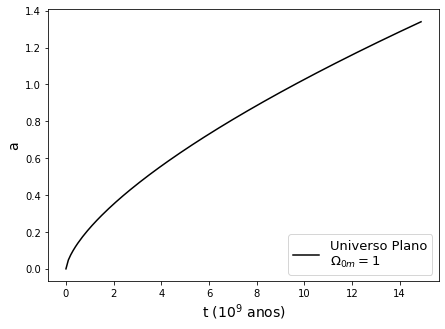

In [ ]:
def scale_factor_matter(t):
  return (3/2 * H0 * t) ** (2/3)

scales_m = scale_factor_matter(tempos)
plt.figure(figsize=[7,5])
plt.plot(tempos, scales_m, 'k-', label='Universo Plano\n$\Omega_{0m}=1$')
plt.legend(loc='lower right', fontsize=13)
plt.xlabel('t ($10^9$ anos)', fontsize=14)
plt.ylabel('a', fontsize=14)
plt.show()

### Radiação 

> Nesse caso, $p = \rho/3 \longrightarrow a(t) \propto t^{1/2}$

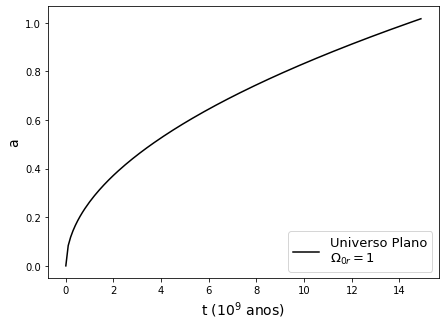

In [ ]:
def scale_factor_rad(t):
  return (H0 * t) ** (1/2)

scales_r = scale_factor_rad(tempos)
plt.figure(figsize=[7,5])
plt.plot(tempos, scales_r, 'k-', label='Universo Plano\n$\Omega_{0r}=1$')
plt.legend(loc='lower right', fontsize=13)
plt.xlabel('t ($10^9$ anos)', fontsize=14)
plt.ylabel('a', fontsize=14)
plt.show()

### Constante Cosmológica

> Densidade constante $\longrightarrow a(t) \propto \exp(t)$

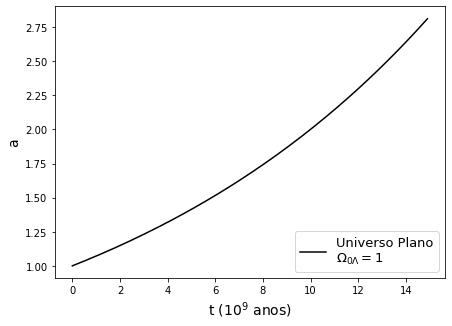

In [ ]:
def scale_factor_lambda(t):
  return np.exp(H0 * t)

scales_l = scale_factor_lambda(tempos)
plt.figure(figsize=[7,5])
plt.plot(tempos, scales_l, 'k-', label='Universo Plano\n$\Omega_{0\Lambda}=1$')
plt.legend(loc='lower right', fontsize=13)
plt.xlabel('t ($10^9$ anos)', fontsize=14)
plt.ylabel('a', fontsize=14)
plt.show()

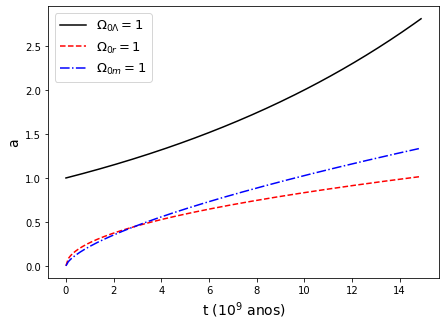

In [ ]:
plt.figure(figsize=[7,5])
plt.plot(tempos, scales_l, 'k-', label='$\Omega_{0\Lambda}=1$')
plt.plot(tempos, scales_r, 'r--', label='$\Omega_{0r}=1$')
plt.plot(tempos, scales_m, 'b-.', label='$\Omega_{0m}=1$')
plt.legend(loc='upper left', fontsize=13)
plt.xlabel('t ($10^9$ anos)', fontsize=14)
plt.ylabel('a', fontsize=14)
plt.show()

## Curvatura não-nula

Soluções exatas

In [ ]:
def matter_curvature(omega_m, theta):
  if omega_m > 1:
    a_theta = 0.5 * omega_m / (omega_m - 1) * (1 - np.cos(theta))
    t_theta = 1 / (2 * H0) * omega_m / (omega_m -1) ** (3/2) * (theta - np.sin(theta))
  elif omega_m < 1:
    a_theta = 0.5 * omega_m / (1 - omega_m) * (np.cosh(theta) - 1)
    t_theta = 1 / (2 * H0) * omega_m / (1 - omega_m) ** (3/2) * (np.sinh(theta) - theta)
  return t_theta, a_theta

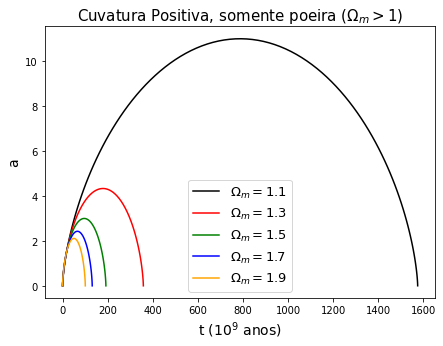

In [ ]:
thetas = np.arange(0, 2 * np.pi, 0.05)
t_matter_positive = np.array([[matter_curvature(om, o)[0] for o in thetas] for om in np.arange(1.1, 2.1, 0.2)])
a_matter_positive = np.array([[matter_curvature(om, o)[1] for o in thetas] for om in np.arange(1.1, 2.1, 0.2)])
colors = ['k', 'r', 'g', 'b', 'orange']
plt.figure(figsize=[7,5])
for i, time in enumerate(t_matter_positive):
    plt.plot(time, a_matter_positive[i], '-', color=colors[i], label='$\Omega_m = {:3.1f}$'.format(1.1 + 0.2 * i))
plt.legend(loc='lower center', fontsize=13)
plt.xlabel('t ($10^9$ anos)', fontsize=14)
plt.ylabel('a', fontsize=14)
plt.title('Cuvatura Positiva, somente poeira ($\Omega_m > 1$)', fontsize=15)
plt.show()

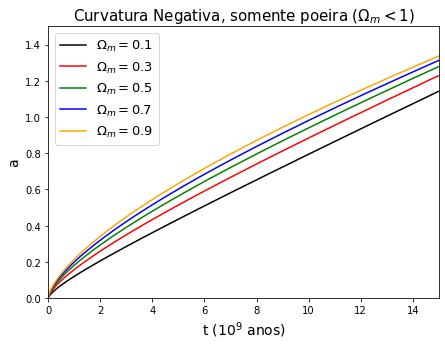

In [ ]:
etas = np.arange(0, 4, 0.02)
t_matter_negative = np.array([[matter_curvature(om, o)[0] for o in etas] for om in np.arange(0.1, 1.0, 0.2)])
a_matter_negative = np.array([[matter_curvature(om, o)[1] for o in etas] for om in np.arange(0.1, 1.0, 0.2)])
colors = ['k', 'r', 'g', 'b', 'orange']
plt.figure(figsize=[7,5])
for i, time in enumerate(t_matter_negative):
    plt.plot(time, a_matter_negative[i], '-', color=colors[i], label='$\Omega_m = {:3.1f}$'.format(0.1 + 0.2 * i))
plt.legend(loc='upper left', fontsize=13)
plt.xlabel('t ($10^9$ anos)', fontsize=14)
plt.ylabel('a', fontsize=14)
plt.xlim([0, 15])
plt.ylim([0, 1.5])
plt.title('Curvatura Negativa, somente poeira ($\Omega_m < 1$)', fontsize=15)
plt.show()

## Múltiplos componentes
Em alguns casos se pode achar soluções analíticas, mas em geral temos que resolver numericamente.
$$
H_0t = \int_0^a \frac{da}{\sqrt{\Omega_m\times a^{-1} + \Omega_r\times a^{-2} + \Omega_{\Lambda}\times a^2 + (1 - \Omega_r - \Omega_m - \Omega_{\Lambda})}}
$$

In [ ]:
def hot(a, omega_m, omega_r, omega_l):
  components = omega_m / a + omega_r / (a ** 2) + omega_l * (a ** 2) + (1 - omega_m - omega_r - omega_l)
  integrand = 1. / np.sqrt(components)
  return integrand

In [ ]:
hots_flat_1 = np.array([quad(lambda a: hot(a, 0.8, 0, 0.2), 1e-5, a) for a in scales])
hots_flat_2 = np.array([quad(lambda a: hot(a, 1.0, 0, 0.0), 1e-5, a) for a in scales])
hots_flat_3 = np.array([quad(lambda a: hot(a, 1.2, 0, -0.2), 1e-5, a) for a in scales])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until


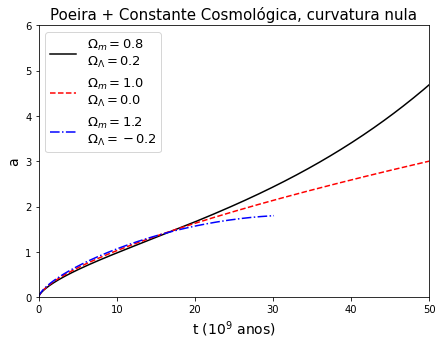

In [ ]:
plt.figure(figsize=[7,5])
plt.plot(hots_flat_1[:,0]/H0, scales, 'k-', label='$\Omega_m = 0.8$\n$\Omega_{\Lambda} = 0.2$')
plt.plot(hots_flat_2[:,0]/H0, scales, 'r--', label='$\Omega_m = 1.0$\n$\Omega_{\Lambda} = 0.0$')
plt.plot(hots_flat_3[:,0]/H0, scales, 'b-.', label='$\Omega_m = 1.2$\n$\Omega_{\Lambda} = -0.2$')
plt.legend(loc='upper left', fontsize=13)
plt.xlim([0, 50])
plt.ylim([0, 6])
plt.title('Poeira + Constante Cosmológica, curvatura nula', fontsize=15)
plt.xlabel('t ($10^9$ anos)', fontsize=14)
plt.ylabel('a', fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  


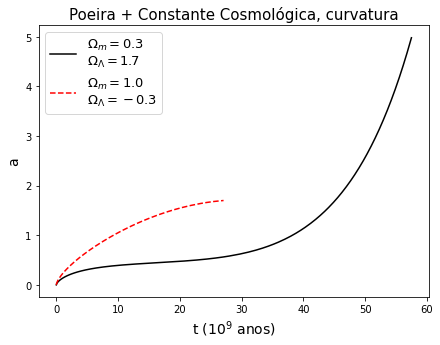

In [ ]:
hots_positive = np.array([quad(lambda a: hot(a, 0.3, 0, 1.7), 1e-6, a) for a in scales])
hots_negative = np.array([quad(lambda a: hot(a, 1, 0, -0.3), 1e-6, a) for a in scales])
plt.figure(figsize=[7,5])
plt.plot(hots_positive[:,0]/H0, scales, 'k-', label='$\Omega_m = 0.3$\n$\Omega_{\Lambda} = 1.7$')
plt.plot(hots_negative[:,0]/H0, scales, 'r--', label='$\Omega_m = 1.0$\n$\Omega_{\Lambda} = -0.3$')
plt.legend(loc='upper left', fontsize=13)
plt.title('Poeira + Constante Cosmológica, curvatura', fontsize=15)
plt.xlabel('t ($10^9$ anos)', fontsize=14)
plt.ylabel('a', fontsize=14)
plt.show()

## Modelo Fiducial
$\Omega_m=0.25$, $\Omega_{\Lambda} = 0.75$, \$\Omega_r = 8.2\times 10^{-5}$



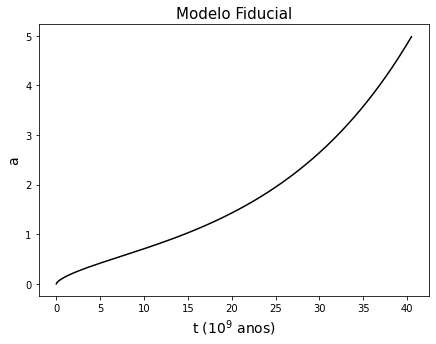

In [ ]:
hot_fiducial = np.array([quad(lambda a: hot(a, 0.25, 8.2e-5, 0.75), 1e-6, a) for a in scales])
plt.figure(figsize=[7,5])
plt.plot(hot_fiducial[:,0]/H0, scales, 'k-')
plt.xlabel('t ($10^9$ anos)', fontsize=14)
plt.ylabel('a', fontsize=14)
plt.title('Modelo Fiducial', fontsize=15)
plt.show()

### Variando os parâmetros um a um, mantendo o resto como acima
> Quantidade de matéria

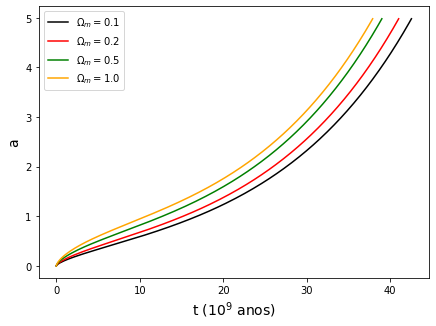

In [ ]:
om_values = [0.1, 0.2, 0.5, 1.0]
colors = ['k', 'r', 'g', 'orange']
hot_omegam = np.array([[quad(lambda a: hot(a, om, 8.2e-5, 0.75), 1e-6, a)[0] for a in scales] for om in om_values])
plt.figure(figsize=[7,5])
for i, time in enumerate(hot_omegam):
  plt.plot(time/H0, scales, color=colors[i], label='$\Omega_m = {}$'.format(om_values[i]))
  plt.legend(loc='upper left')
plt.xlabel('t ($10^9$ anos)', fontsize=14)
plt.ylabel('a', fontsize=14)
plt.show()

> Constante cosmológica

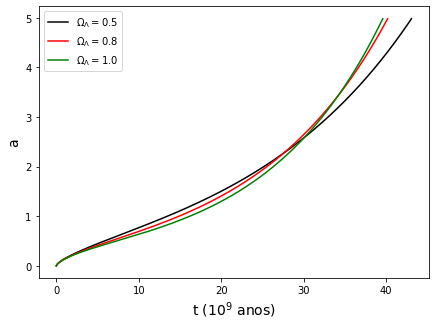

In [ ]:
ol_values = [0.5, 0.8, 1.0]
colors = ['k', 'r', 'g']
hot_omegal = np.array([[quad(lambda a: hot(a, 0.25, 8.2e-5, ol), 1e-6, a)[0] for a in scales] for ol in ol_values])
plt.figure(figsize=[7,5])
for i, time in enumerate(hot_omegal):
  plt.plot(time/H0, scales, color=colors[i], label='$\Omega_{{\Lambda}} = {}$'.format(ol_values[i]))
  plt.legend(loc='upper left')
plt.xlabel('t ($10^9$ anos)', fontsize=14)
plt.ylabel('a', fontsize=14)
plt.show()

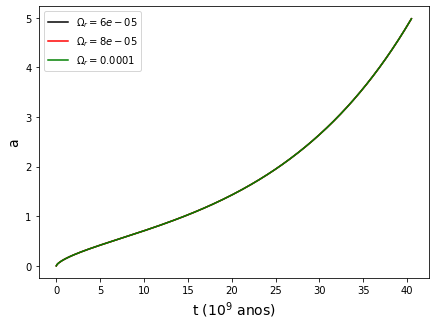

In [ ]:
or_values = [6e-5, 8e-5, 10e-5]
colors = ['k', 'r', 'g']
hot_omegar = np.array([[quad(lambda a: hot(a, 0.25, orr, 0.75), 1e-6, a)[0] for a in scales] for orr in or_values])
plt.figure(figsize=[7,5])
for i, time in enumerate(hot_omegar):
  plt.plot(time/H0, scales, color=colors[i], label='$\Omega_r = {}$'.format(or_values[i]))
  plt.legend(loc='upper left')
plt.xlabel('t ($10^9$ anos)', fontsize=14)
plt.ylabel('a', fontsize=14)
plt.show()

O que pode acontecer se, ao invés de usarmos uma constante cosmológica, usarmos um fluido perfeito com densidade variando no tempo? Nesse caso a equação de estado é $p=w\rho$, com $w$ uma constante. Se $w<-1/3$, esse fluido causa uma gravitação repulsiva e pode ser o responsável pela aceleração. Vamos ver como o fator de escala se comporta para diferentes valores de $w$.

In [ ]:
def hot_with_w(a, omega_m, omega_r, omega_l, w):
  components = omega_m / a + omega_r / (a ** 2) + omega_l * (a ** (-1-3*w)) + (1 - omega_m - omega_r - omega_l)
  integrand = 1. / np.sqrt(components)
  return integrand

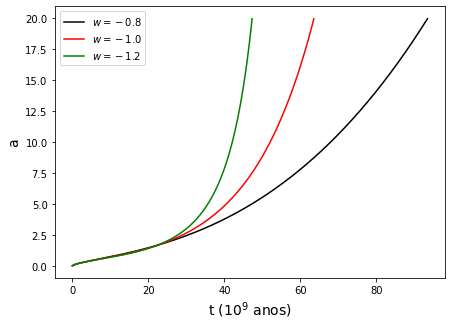

In [ ]:
new_scales = np.arange(0, 20, 0.08)
w_values = [-0.8, -1.0, -1.2]
colors = ['k', 'r', 'g']
hot_w = np.array([[quad(lambda a: hot_with_w(a, 0.25, 8.2e-5, 0.75, w), 1e-6, a)[0] for a in new_scales] for w in w_values])
plt.figure(figsize=[7,5])
for i, time in enumerate(hot_w):
  plt.plot(time/H0, new_scales, color=colors[i], label='$w = {}$'.format(w_values[i]))
  plt.legend(loc='upper left')
plt.xlabel('t ($10^9$ anos)', fontsize=14)
plt.ylabel('a', fontsize=14)
plt.show()

Interessante notar que, para $w<-1$, a densidade do fluido cresce com o tempo, assim como a taxa de expansão $H$. Isso fará com que o universo acabe em um _Big Rip_, onde todas as estruturas serão desintegradas pela expansão.